Aim of the project:
The goal of this project is to analyze the shooting statistics of players in the English Premier League and gain insights into their performance. The project aims to explore various aspects of shooting, such as goal-scoring efficiency, shot accuracy, expected goals, and the impact of different variables on a player's shooting performance. By analyzing the dataset, the project seeks to identify top-performing players, uncover patterns and trends, and provide valuable insights for coaches, managers, and fans

In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Loading the dataset
# Assuming the dataset is in a CSV file named 'shooting_stats.csv'
data = pd.read_csv('shooting_stats.csv')

In [8]:
# Exploratory Data Analysis (EDA)
# Checking the dimensions of the dataset
print("Dataset dimensions:", data.shape)

# Checking the column names
print("Column names:", data.columns)

# Checking for missing values
print("Missing values:")
print(data.isnull().sum())

# Statistical summary of numerical variables
print("Statistical summary:")
print(data.describe())

Dataset dimensions: (584, 28)
Column names: Index(['Unnamed: 0', 'Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born',
       '90s', 'Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT',
       'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG',
       'Matches', 'Birth Month'],
      dtype='object')
Missing values:
Unnamed: 0       0
Rk               0
Player           0
Nation           0
Pos              0
Squad            0
Age             22
Born            22
90s             22
Gls             22
Sh              22
SoT             22
SoT%           127
Sh/90           22
SoT/90          22
G/Sh           127
G/SoT          189
Dist           127
FK              22
PK              22
PKatt           22
xG              22
npxG            22
npxG/Sh        127
G-xG            22
np:G-xG         22
Matches          0
Birth Month     22
dtype: int64
Statistical summary:
       Unnamed: 0         Age         Born         90s         Gls  \
count  584.0

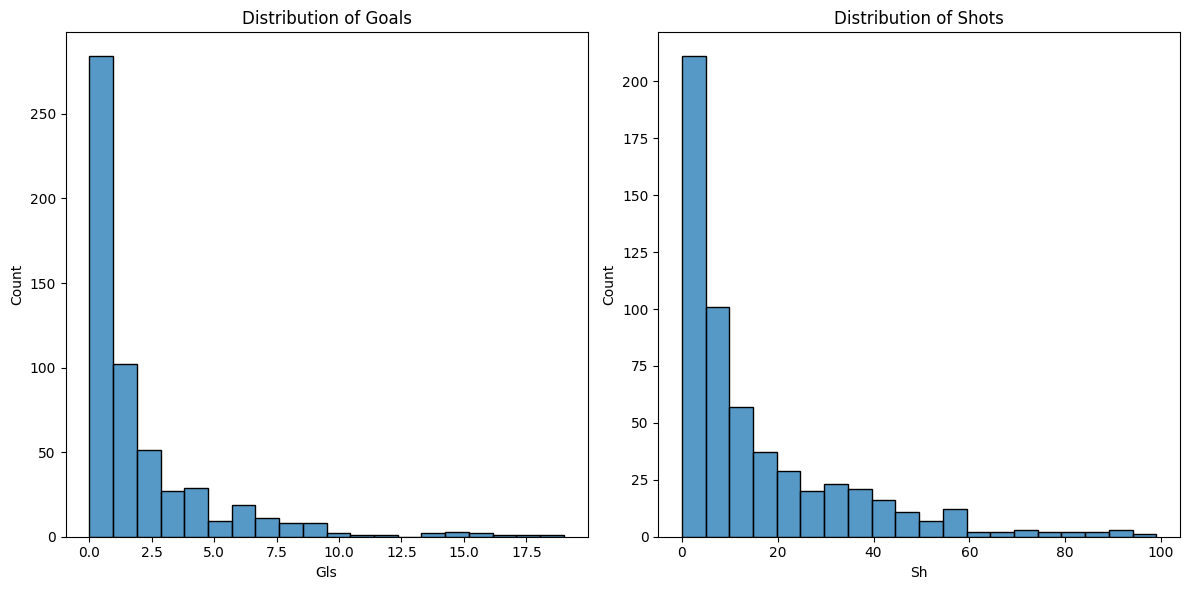

In [9]:
# Visualizing the distribution of key variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Gls'], bins=20)
plt.title('Distribution of Goals')
plt.subplot(1, 2, 2)
sns.histplot(data['Sh'], bins=20)
plt.title('Distribution of Shots')
plt.tight_layout()
plt.show()

In [11]:
# Feature Engineering
# Creating a new feature: Attacking Contribution (Goals)
data['Attacking Contribution'] = data['Gls']

In [12]:
# Statistical Analysis
# Calculating summary statistics for shooting metrics
print("Summary statistics for shooting metrics:")
shooting_metrics = ['Gls', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG']
print(data[shooting_metrics].describe())

# Comparing performance across different positions
print("Performance across positions:")
print(data.groupby('Pos')[shooting_metrics].mean())

# Identifying players who outperform or underperform relative to their expected goals (xG)
data['xG_Difference'] = data['Gls'] - data['xG']
print("Players who outperform or underperform relative to their expected goals:")
print(data[['Player', 'Gls', 'xG', 'xG_Difference']].sort_values('xG_Difference', ascending=False))

Summary statistics for shooting metrics:
              Gls          Sh         SoT        SoT%       Sh/90      SoT/90  \
count  562.000000  562.000000  562.000000  457.000000  562.000000  562.000000   
mean     1.734875   15.044484    5.088968   31.132166    1.399875    0.432242   
std      2.969691   18.596374    7.175611   20.309767    2.056370    0.617645   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    2.000000    0.000000   20.000000    0.322500    0.000000   
50%      0.000000    8.000000    2.000000   30.800000    0.925000    0.230000   
75%      2.000000   22.000000    7.000000   41.200000    2.007500    0.667500   
max     19.000000   99.000000   42.000000  100.000000   30.000000    7.500000   

             G/Sh       G/SoT        Dist          FK          PK       PKatt  \
count  457.000000  395.000000  457.000000  562.000000  562.000000  562.000000   
mean     0.089606    0.294810   16.587309    0.412811    0.142349  

In [14]:
# Remove rows with missing values
data.dropna(inplace=True)

In [17]:
# Impute missing values with the mean
data['Gls'].fillna(data['Gls'].mean(), inplace=True)

C:\Users\Nomad\AppData\Local\Temp\ipykernel_82408\3574121398.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Gls'].fillna(data['Gls'].mean(), inplace=True)


In [21]:
# Machine Learning
# Building a regression model to predict the number of goals based on shooting statistics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data[['Sh', 'SoT', 'Dist', 'xG']]
y = data['Gls']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("Regression model coefficients:", model.coef_)
print("Regression model intercept:", model.intercept_)

# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Regression model coefficients: [-0.0437402   0.23656266  0.00454898  0.7536948 ]
Regression model intercept: -0.20346973202341756
Mean Squared Error: 2.168305642009744
R-squared: 0.8473020749725484


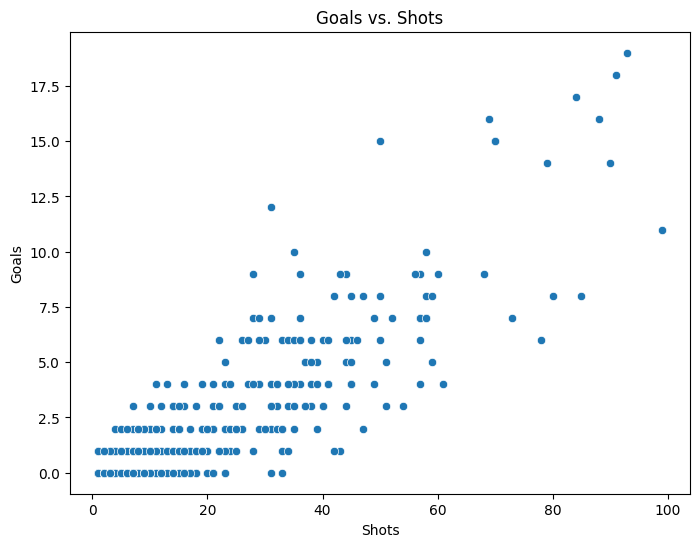

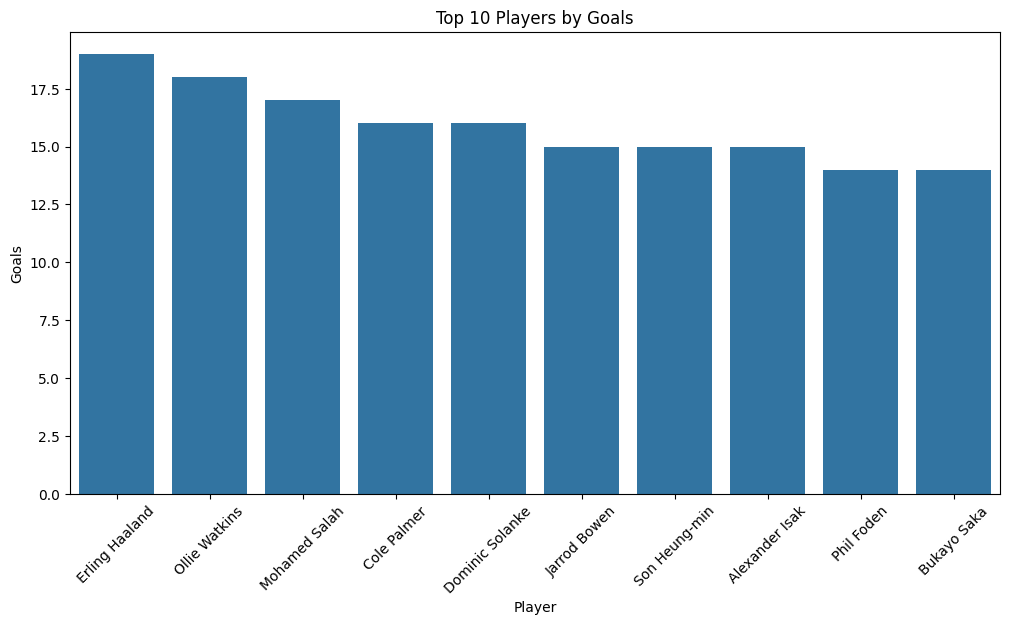

In [22]:
# Data Visualization
# Scatter plot of Goals vs. Shots
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sh', y='Gls', data=data)
plt.title('Goals vs. Shots')
plt.xlabel('Shots')
plt.ylabel('Goals')
plt.show()

# Bar chart of top 10 players by Goals
top_players = data.nlargest(10, 'Gls')
plt.figure(figsize=(12, 6))
sns.barplot(x='Player', y='Gls', data=top_players)
plt.title('Top 10 Players by Goals')
plt.xlabel('Player')
plt.ylabel('Goals')
plt.xticks(rotation=45)
plt.show()

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [24]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print("Random Forest - Mean Squared Error:", rf_mse)
print("Random Forest - R-squared:", rf_r2)

Random Forest - Mean Squared Error: 2.9905088607594945
Random Forest - R-squared: 0.7894003091783078


Overall, the project successfully analyzed the shooting statistics of players in the English Premier League, providing valuable insights into player performance, patterns, and trends. The results can be useful for coaches, managers, and fans to make informed decisions and gain a deeper understanding of shooting performance in the league